In [1]:
# general imports 
import allensdk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# set data path
import sys
import platform
from os.path import join as pjoin

platstring = platform.platform()
system = platform.system()
if system == "Darwin":
    # macOS
    data_dir = "/Volumes/Brain2025/"
elif system == "Windows":
    # Windows (replace with the drive letter of USB drive)
    data_dir = "E:/"
elif "amzn" in platstring:
    # then on CodeOcean
    data_dir = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_dir = "/media/$USERNAME/Brain2025/"
    
print('data directory set to', data_dir)

data directory set to /Volumes/Brain2025/


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load the Project Cache</h2> 
    
The code below shows how to use the VisualBehaviorOphysProjectCache class to load metadata tables and explore the features of the dataset. 

In [3]:
# import behavior project cache class to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache_dir = r'/Users/marinag/Documents/Data/visual_behavior_ophys_cache_dir'
cache = VisualBehaviorOphysProjectCache.from_local_cache( cache_dir=cache_dir)

/Users/marinag/anaconda3/envs/allensdk_bou/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/marinag/anaconda3/envs/allensdk_bou/lib/python3.9/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentatio

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load the ophys experiment table</h2>

The AllenSDK has specific accessor methods to load the CSVs and return a pandas DataFrame with a row for each item and column for each metadata metric. 
    
Let's load the ophys_experiment_table.csv using the `get_ophys_experiment_table` method.  


In [4]:
ophys_experiment_table = cache.get_ophys_experiment_table() 
ophys_experiment_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [5]:
ophys_experiment_table.columns

Index(['behavior_session_id', 'ophys_session_id', 'ophys_container_id',
       'mouse_id', 'indicator', 'full_genotype', 'driver_line', 'cre_line',
       'reporter_line', 'sex', 'age_in_days', 'imaging_depth',
       'targeted_structure', 'targeted_imaging_depth', 'imaging_plane_group',
       'project_code', 'session_type', 'session_number', 'image_set',
       'behavior_type', 'passive', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'published_at', 'isi_experiment_id', 'file_id'],
      dtype='object')

In [6]:
# Let's get a novel session for Vip cells
selected_experiments = ophys_experiment_table[(ophys_experiment_table.cre_line=='Vip-IRES-Cre') &
                        (ophys_experiment_table.prior_exposures_to_image_set==0)]

print('Number of experiments: {}'.format(len(selected_experiments.index.unique())))
selected_experiments.head()

Number of experiments: 75


,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
795953296,795742990,795625712,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel 1,0,0,4,2018-12-14 12:37:49.365000+00:00,CAM2P.4,2021-03-25,754116317,55
830093338,829578829,829521794,825183217,429952,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,6,2019-02-27 09:00:15.820000+00:00,CAM2P.4,2021-03-25,802841369,60
1010556648,1010371498,1010346697,1018027796,499478,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel 1,0,0,4,2020-02-26 09:28:33.055000+00:00,MESO.1,2021-08-12,994736136,179
1010556652,1010371498,1010346697,1018027802,499478,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel 1,0,0,4,2020-02-26 09:28:33.055000+00:00,MESO.1,2021-08-12,994736136,180
1010556655,1010371498,1010346697,1018027809,499478,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel 1,0,0,4,2020-02-26 09:28:33.055000+00:00,MESO.1,2021-08-12,994736136,181


In [7]:
# select an experiment id from the table 
ophys_experiment_id = selected_experiments.index.values[10]

# load the data for this ophys experiment from the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/Users/marinag/anaconda3/envs/allensdk_bou/lib/python3.9/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Inspect the experiment object attributes</h4>
    
Using the `list_data_attributes_and_methods()` method will show us all of the attributes of the `ophys_experiment` object. 

In [8]:
ophys_experiment.list_data_attributes_and_methods()

['average_projection',
 'behavior_session_id',
 'cell_specimen_table',
 'corrected_fluorescence_traces',
 'demixed_traces',
 'dff_traces',
 'events',
 'eye_tracking',
 'eye_tracking_rig_geometry',
 'get_cell_specimen_ids',
 'get_cell_specimen_indices',
 'get_dff_traces',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'get_segmentation_mask_image',
 'licks',
 'max_projection',
 'metadata',
 'motion_correction',
 'neuropil_traces',
 'ophys_experiment_id',
 'ophys_session_id',
 'ophys_timestamps',
 'raw_running_speed',
 'rewards',
 'roi_masks',
 'running_speed',
 'segmentation_mask_image',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials',
 'update_targeted_imaging_depth']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Neural Activity Timeseries: DF/F</h2>
    
After ROIs are segmented, the average fluorescence value is calculated for each ROI then baseline subtracted and normalized to yield the change in fluorescence over baseline (df/f). These are the cell activity traces typically used for analysis.
    
    
The `dff_traces` table is organized by both `cell_specimen_id` and `cell_roi_id`.

In [9]:
# Get fluorescence traces 

dff_traces = ophys_experiment.dff_traces
dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1086606969,1081960102,"[3.502587829590469, 4.297021414074811, 2.81245..."
1086607016,1081960104,"[1.2503295677182906, 4.032230395460874, 1.2812..."
1086608087,1081960106,"[15.748118158639484, 16.215531643029696, 11.90..."
1086607408,1081960128,"[31.430985505453545, 27.60969017757136, 24.849..."
1086607438,1081960131,"[21.890531542878975, 21.366043314497897, 18.45..."


In [10]:
# Get ophys timestamps to go along with traces

ophys_timestamps = ophys_experiment.ophys_timestamps
ophys_timestamps

array([   9.50996,    9.61944,    9.72892, ..., 4519.18447, 4519.29398,
       4519.40349])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Stimulus Presentations</h2>
    
The stimulus presentations table contains one entry for each visual stimulus that was presented during the session, along with important metadata about the stimulus. 

In [11]:
stimulus_presentations = ophys_experiment.stimulus_presentations
stimulus_presentations.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,is_sham_change,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,309.55812,0.00000,309.55812,0,17985,False,<NA>,<NA>,-99,0,-99,spontaneous,False,False
1,1,change_detection_behavior,0,im000,-99,0.25016,309.55812,309.80828,17985,18000,False,True,False,-99,1,0,Natural_Images_Lum_Matched_set_ophys_6_2017,False,True
2,1,change_detection_behavior,8,omitted,-99,0.25000,310.30870,310.55870,18030,18045,False,<NA>,True,-99,1,0,Natural_Images_Lum_Matched_set_ophys_6_2017,False,True
3,1,change_detection_behavior,0,im000,-99,0.25017,311.05938,311.30955,18075,18090,False,True,False,-99,2,1,Natural_Images_Lum_Matched_set_ophys_6_2017,False,True
4,1,change_detection_behavior,0,im000,-99,0.25020,311.80996,312.06016,18120,18135,False,True,False,-99,3,1,Natural_Images_Lum_Matched_set_ophys_6_2017,False,True


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity alongside stimuli</h4>

Let's replicate the plot of activity traces from above, now adding the timing of stimulus presentations as gray vertical bars

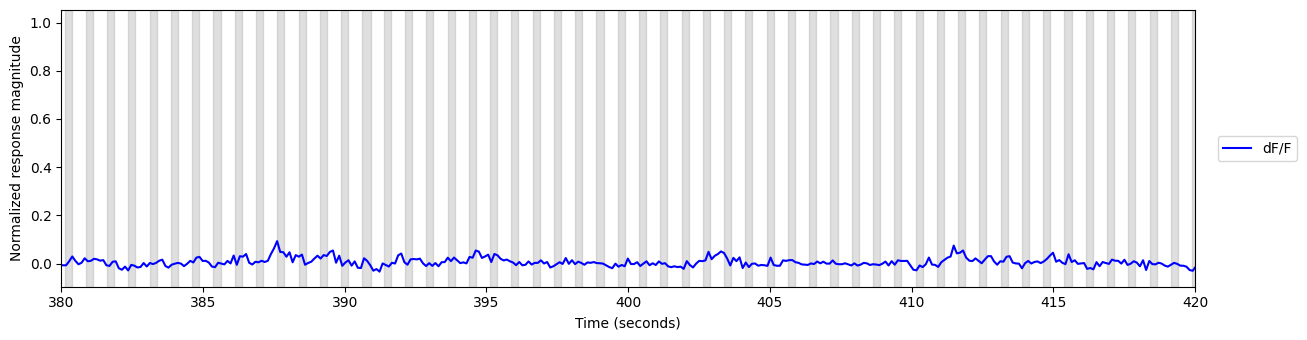

In [12]:
# Plot dF/F and events for one cell with stimulus presentations
roi = 5
initial_time = 380
final_time = 420

fig, ax = plt.subplots(figsize=(15, 3.5))

# plot dF/F
ax.plot(
    ophys_timestamps, 
    dff_traces.iloc[roi]['dff'] / dff_traces.iloc[roi]['dff'].max(), 
    color='blue', label='dF/F'
)

# add shaded regions for stimulus presentations 
for idx, stimulus in stimulus_presentations.iterrows():
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color='gray', alpha=0.25)

ax.set_ylabel('Normalized response magnitude')
ax.set_xlabel('Time (seconds)')
ax.set_xlim([initial_time, final_time])

# legend outside to the right
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # make space for legend
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Behavior measurements</h2>
    
There are 4 behavior modalities collected alongside the 2p images: licks, rewards, running speed, and eye tracking. 
    

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity with stimuli and behavior</h4>
    
Let's plot activity traces and stimuli again, now with an additional axis for behavior variables

(14, 41185)


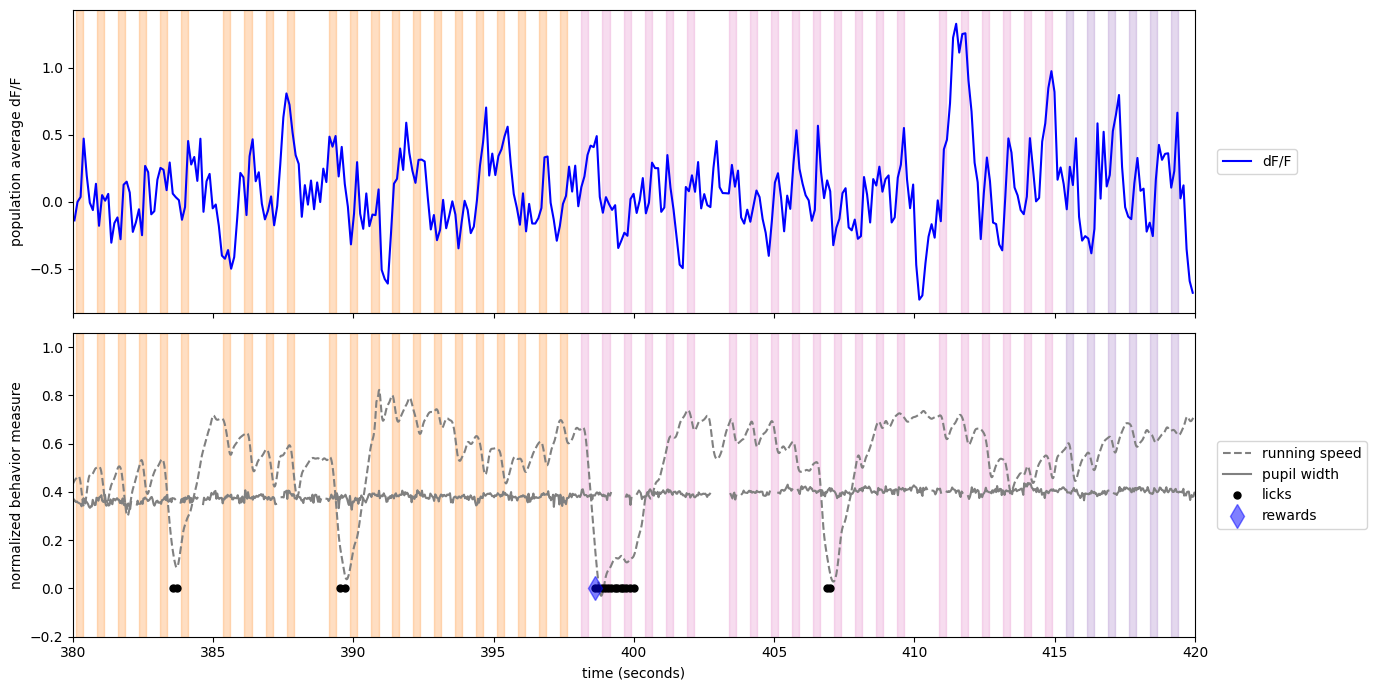

In [13]:

initial_time = 380
final_time = 420

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

# get mean df?F across the population 
traces = np.vstack(dff_traces['dff'])
print(traces.shape)
mean_dff = np.mean(traces, axis=0)
# limit mean dff to time points in this window (prevents yscale from being set to entire session values)
start_ind = np.where(ophys_timestamps>=initial_time)[0][0]
stop_ind = np.where(ophys_timestamps>=final_time)[0][0]
mean_dff = mean_dff[start_ind:stop_ind]
timestamps = ophys_timestamps[start_ind:stop_ind]

# plot population dF/F 
ax1.plot(timestamps,  mean_dff, color='blue', label='dF/F')
ax1.set_ylabel('population average dF/F')

# plot running speed - normalized by max 
ax2.plot(
    ophys_experiment.running_speed.timestamps,
    ophys_experiment.running_speed.speed / ophys_experiment.running_speed.speed.max(), 
    '--', color = 'gray', label='running speed'
)

# plot pupil area - normalized by max 
ax2.plot(
    ophys_experiment.eye_tracking.timestamps,
    ophys_experiment.eye_tracking.pupil_width / ophys_experiment.eye_tracking.pupil_width.max(), 
    color = 'gray',label='pupil width'
)
# plot licks
ax2.plot(
    ophys_experiment.licks.timestamps,
    np.zeros_like(ophys_experiment.licks.timestamps),
    marker='o', color='black', linestyle='none', markersize=5, label='licks'
)

# plot rewards 
ax2.plot(
    ophys_experiment.rewards.timestamps,
    np.zeros_like(ophys_experiment.rewards.timestamps),
    marker='d', color='blue', linestyle='none', markersize=12, alpha=0.5, label='rewards'
)
ax2.set_xlim([initial_time, final_time])
ax2.set_xlabel('time (seconds)')
ax2.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

# limit stimuli to the relevant time window 
stimuli = stimulus_presentations[(stimulus_presentations.start_time>=initial_time) 
                                 & (stimulus_presentations.end_time<=final_time)]
colors = sns.color_palette()
image_names = stimulus_presentations.image_name.unique()
# plot stimulus presentations on first axis
for idx, stimulus in stimuli.iterrows():
    image_name = stimulus['image_name']
    if image_name !='omitted': # skip plotting for omissions
        color_ind = np.where(image_names==image_name)[0][0]
        ax1.axvspan(stimulus['start_time'], stimulus['end_time'], color=colors[color_ind], alpha=0.25)
ax1.set_xlim([initial_time, final_time])
ax1.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

# plot stimulus presentations on second axis
for idx, stimulus in stimuli.iterrows():
    image_name = stimulus['image_name']
    if image_name !='omitted': # skip plotting for omissions
        color_ind = np.where(image_names==image_name)[0][0]
        ax2.axvspan(stimulus['start_time'], stimulus['end_time'], color=colors[color_ind], alpha=0.25)
ax2.set_ylabel('normalized behavior measure')
ax2.set_xlim([initial_time, final_time])
ax2.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)


plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Using Brain Observatory Utilities to annotate stimulus presentations and get event aligned traces</h2>

The `brain_observatory_utilities` repository contains tools for manipulating and analyzing Visual Behavior datasets loaded via the AllenSDK, including convenience functions to add useful annotations to the stimulus presentations table, and to extract stimulus or other event aligned traces. The traces that can be used include dF/F, events, spike rates, lick rate, running speed, and pupil diameter. Events that can be used include stimulus start times, rewards, and licks. 
    
You can learn how it works via the tutorial provided in the repo here: https://github.com/AllenInstitute/brain_observatory_utilities/blob/main/example_notebooks/event_triggered_response_example_extended.ipynb
    


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Annotate stimulus presentations</h3>

The `get_annotated_stimulus_presentations` function takes in the session or experiment object and adds a bunch of useful columns to the stimulus preentations table. This can be helpful to parse data in different ways and can be linked to the physiology responses for each stimulus to investigate activity under different conditions.  


In [14]:
from brain_observatory_utilities.datasets.behavior import data_formatting as behavior_utils

In [15]:
annotated_stimulus_presentations = behavior_utils.get_annotated_stimulus_presentations(ophys_experiment)

/Users/marinag/Documents/Code/brain_observatory_utilities/brain_observatory_utilities/utilities/general_utilities.py:12: RuntimeWarning: Mean of empty slice.
  return values_this_range.mean()
/Users/marinag/anaconda3/envs/allensdk_bou/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/marinag/Documents/Code/brain_observatory_utilities/brain_observatory_utilities/datasets/behavior/data_formatting.py:528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['change_trials_id'] = trials.index.values


In [16]:
annotated_stimulus_presentations.columns

Index(['trials_id', 'stimulus_block', 'stimulus_block_name', 'image_index',
       'image_name', 'movie_frame_index', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'movie_repeat', 'flashes_since_change', 'stimulus_name',
       'is_sham_change', 'active', 'licks', 'first_lick_time', 'lick_latency',
       'mean_running_speed', 'mean_pupil_width', 'change_trials_id',
       'change_time', 'go', 'catch', 'auto_rewarded', 'hit', 'miss',
       'false_alarm', 'correct_reject', 'response_time', 'reward_time',
       'reward_volume', 'time_from_last_change', 'licked',
       'stimulus_count_within_trial', 'previous_image_name',
       'previous_response_on_trial', 'previous_change_on_trial',
       'could_change', 'pre_change', 'lick_on_next_flash', 'pre_omitted',
       'post_omitted', 'reward_rate', 'engaged', 'engagement_state', 'epoch'],
      dtype='object')

Thats a lot of columns! 

Some useful ones are described below. 

The `flashes_since_change` column tells you how many presentations of the same image have occured since the last image change. 

The`could_change` column labels each image presentation that could have been a change (i.e. it was not during the reward consumption window or during the 4 flashes at the start of a trial when the stimulus can never change) - this can be used to remove omissions that occur just after changes, or to remove repeated image presentations that could not change when computing false alarm rates. 

The `post_omitted` column (a Boolean value) can help you identify the image presentations just after omissions to evaluate whether mice licked following omissions or not. 

The `licks` column gives the time of any licks that happened during the stimulus presentation. 

The `lick_latency` column gives the time of the first lick relative to the stimulus onset for that stimulus presentation.

The `engaged` column tells you whether the mice was in an engaged period (with rolling reward rate >2 rewards / second) for each stimulus presentation. 

In [17]:
# Examine some of the columns related to the task logic
# Talk to Marina if this is confusing (because it is!)
annotated_stimulus_presentations[['image_name',  'trials_id', 'could_change',  'is_change', 'auto_rewarded', 'go', 'catch', 'change_trials_id', 'flashes_since_change', 'licked', 'licks', 'lick_latency', 'reward_time', 'hit', 'miss']][:30]

,image_name,trials_id,could_change,is_change,auto_rewarded,go,catch,change_trials_id,flashes_since_change,licked,licks,lick_latency,reward_time,hit,miss
stimulus_presentations_id,,,,,,,,,,,,,,,
1,im000,0,False,False,NaN,NaN,NaN,NaN,1,True,"[310.1723, 310.27233]",0.61418,NaN,NaN,NaN
2,omitted,0,False,False,NaN,NaN,NaN,NaN,1,False,[],NaN,NaN,NaN,NaN
3,im000,1,False,False,NaN,NaN,NaN,NaN,2,False,[],NaN,NaN,NaN,NaN
4,im000,1,False,False,NaN,NaN,NaN,NaN,3,True,"[312.274, 312.42412]",0.46404,NaN,NaN,NaN
5,im000,1,False,False,NaN,NaN,NaN,NaN,4,True,[312.59093],0.03035,NaN,NaN,NaN
6,im000,2,False,False,NaN,NaN,NaN,NaN,5,False,[],NaN,NaN,NaN,NaN
7,im000,2,False,False,NaN,NaN,NaN,NaN,6,True,"[314.44246, 314.59252]",0.38070,NaN,NaN,NaN
8,im000,2,False,False,NaN,NaN,NaN,NaN,7,False,[],NaN,NaN,NaN,NaN
9,im000,3,False,False,NaN,NaN,NaN,NaN,8,False,[],NaN,NaN,NaN,NaN


A few more columns: 

`trials_id`: the trial number the image presentation belongs to based on the experimenter defined task structure. A trial is composed of many image presentations, starting with a repeated image.
When a trial starts, a change time is drawn from an exponential distribution between 4 and 12 flashes. This means that the image cannot change for at least 4 trials following the trial start. 
If the mouse licks prior to the change time, the trial is aborted and the trial is reset, using the same selected change time for up to 5 trials. 
After the image change occurs, there is a 3 second response window / grace period to allow for reward consumption before the next trial starts. 

`could_change`: indicates whether a stimulus presentation could change based on the task rules. Specifically, whether the image presentation falls in the exponential distribution between 4-12 flashes after trial start. 

`is_change`: whether the stimulus presentation was a change or not

`auto_rewarded`: During the first 3-5 trials of each session, mice are given a free reward at the time of the image change. 
This communicates to the mouse that reward is available and that it is time to do the task.

`go`: whether the image presentation was a change and reward delivery was contingent on the animals licking behavior. 
Go trials can be hits or misses depending on the animal's licking.
Contrast with `auto_rewarded` trials. 

`catch`: whether the image presentation was non-change that conformed to the same statistics as the change time distribution. 
i.e. on each trial, a change time is drawn and the next image identity is randomly selected, and on some trials the same image is selected
this is the maximally conservative definition of a catch trial.
Its important to note that catch trials could also be defined as any non-change image where the stimulus could have changed according to the task rules. 
These non-change image presentations can be identified using the `could_change` column, and can be used to compute false alarm rates with more robustness than the strict definition of catch trials

`change_trials_id`: the trial ID only for stimulus presentations where a change actually occured. 
Will match with `trials_id` but is only listed for stimulus presentations corresponding to image changes. 

`flashes_since_change`: the number of presentations of the same image since the time of the last change_trials_id

`licked`: whether or not the mouse licked during the stimulus presentation window

`licks`: times of all licks during the stimulus presentation window

`lick_latency`: the time of the first lick relative to the stimulus presentation start time

`reward_time`: the time of reward delivery for that stimulus presentation

`hit`: whether the mouse responded correctly on a go trial (licks on auto-rewarded trials are not considered hits)

`miss`: if the mouse did not respond to a change on a go trial


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Stimulus aligned traces</h2>

The `get_stimulus_response_df` function takes in the session or experiment object and pulls out specified timeseries data (indicated by the `data_type`) around the time of stimulus presentations in a window defined by `time_window`. 
    
It will also compute the average of the timeseries in a 500ms window after the stimulus onset (or any duration of window that you set). Setting the `event_type` column to `changes` or `omissions` will return traces aligned to only changes or only omissions, if desired. 

There are different functions for stimulus aligned responses for ophys versus ecephys. 

The `data_type` columm can be `running_speed`, `pupil_width`, or `lick_rate` for either function. 


For neuropixels data, `data_type` can be `spike_rate` and a `spike_rate_bin_size` is provided for binning (default = 10ms). 

For ophys neural data, `data_type` can be `dff`, `events`, or `filtered_events`. 


In [18]:
from brain_observatory_utilities.datasets.stimulus_alignment import data_formatting as alignment_utils

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Stimulus running speed</h3>

We can give `data_type` = `running_speed` to get a segment of the running trace around each stimulus presentation using the`get_stimulus_response_df` function. The `time_window` parameter determines how much time around the stimulus presentation is included in the trace segment. 

Then we can merge it with the `annotated_stimulus_presentations` table to get all the stimulus condition information, 
then filter to get change trials for plotting. 


In [19]:
time_window=[-2, 3]
running_stim_df = alignment_utils.get_stimulus_response_df(ophys_experiment,
                                    data_type='running_speed',
                                    event_type='all',
                                    time_window=time_window,
                                    response_window_duration=0.5, 
                                    stimulus_block='change_detection_behavior')

100%|██████████| 1/1 [00:00<00:00, 11.55it/s]


In [20]:
# Now we have a dataframe with one row for every stimulus_presentations_id 
# with a segment of the running_speed timeseries in the trace column for each stimulus presentation
running_stim_df.head()

,stimulus_presentations_id,trace_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,data_type,event_type,interpolate,output_sampling_rate,response_window_duration,spike_rate_bin_size,stimulus_block
0,1,0,"[47.78429524993965, 47.593846123094615, 47.400...","[-1.9849773675333802, -1.9682968854532676, -1....",37.112866,52.440998,0.0,running_speed,all,False,59.950306,0.5,0.01,change_detection_behavior
1,2,0,"[43.65863513680057, 43.960683282278985, 44.195...","[-1.9849773675333802, -1.9682968854532676, -1....",5.414630,10.135501,0.0,running_speed,all,False,59.950306,0.5,0.01,change_detection_behavior
2,3,0,"[50.443410693386696, 50.530682615200156, 50.67...","[-1.9849773675333802, -1.9682968854532676, -1....",25.337380,18.483129,0.0,running_speed,all,False,59.950306,0.5,0.01,change_detection_behavior
3,4,0,"[37.726594041860814, 35.30302626494669, 32.884...","[-1.9849773675333802, -1.9682968854532676, -1....",17.841929,19.446697,0.0,running_speed,all,False,59.950306,0.5,0.01,change_detection_behavior
4,5,0,"[4.600226256172794, 4.979682808481143, 5.42093...","[-1.9849773675333802, -1.9682968854532676, -1....",9.993215,4.024207,0.0,running_speed,all,False,59.950306,0.5,0.01,change_detection_behavior


In [21]:
# Merge with annotated stimulus presentations so we can subset to specific conditions
# Both tables have the 'stimulus_presentations_id' as a column, and no other unique columns, so we can merge easily
running_stim_df = running_stim_df.merge(annotated_stimulus_presentations, on='stimulus_presentations_id')

In [22]:
# Now we have lots of useful stuff
running_stim_df.columns

Index(['stimulus_presentations_id', 'trace_id', 'trace', 'trace_timestamps',
       'mean_response', 'baseline_response', 'p_value_gray_screen',
       'data_type', 'event_type', 'interpolate', 'output_sampling_rate',
       'response_window_duration', 'spike_rate_bin_size', 'stimulus_block_x',
       'trials_id', 'stimulus_block_y', 'stimulus_block_name', 'image_index',
       'image_name', 'movie_frame_index', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'movie_repeat', 'flashes_since_change', 'stimulus_name',
       'is_sham_change', 'active', 'licks', 'first_lick_time', 'lick_latency',
       'mean_running_speed', 'mean_pupil_width', 'change_trials_id',
       'change_time', 'go', 'catch', 'auto_rewarded', 'hit', 'miss',
       'false_alarm', 'correct_reject', 'response_time', 'reward_time',
       'reward_volume', 'time_from_last_change', 'licked',
       'stimulus_count_within_trial', 'previous_image_nam

Text(0, 0.5, 'Running speed (cm/s)')

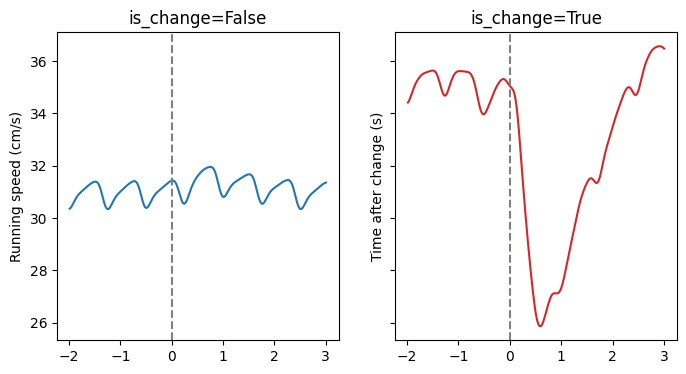

In [23]:
# Let's plot the running for changes and non-changes
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)

# Get colors for plot (ignoring the second one in seaborn color palette because it is orange and orange is ugly)
colors = sns.color_palette()[0], sns.color_palette()[3]

for i, is_change in enumerate(running_stim_df.is_change.unique()):
    # Get the mean trace across trials for change or no change
    mean_trace = running_stim_df[running_stim_df.is_change==is_change].trace.mean()
    # Get the timestamps from the first row (all rows are the same because we aligned to stim onset)
    timestamps = running_stim_df[running_stim_df.is_change==is_change].trace_timestamps.values[0]
    # Plot it on one axis
    ax[i].plot(timestamps, mean_trace, label=is_change, color=colors[i])
    ax[i].set_title('is_change='+str(is_change))
    ax[i].set_ylabel('Time after change (s)')
    ax[i].axvline(x=0, ymin=0, ymax=1, linestyle='--', color='gray')
    
ax[0].set_ylabel('Running speed (cm/s)')

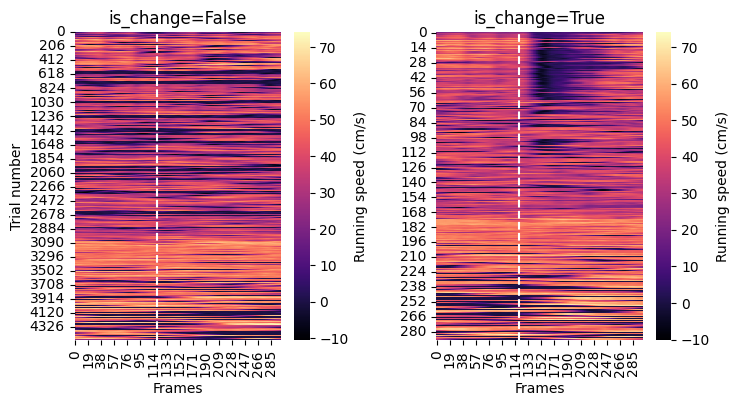

In [24]:
# Let's plot the running for changes and non-changes
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=False)

# Get colors for plot (ignoring the second one in seaborn color palette because it is orange and orange is ugly)
colors = sns.color_palette()[0], sns.color_palette()[3]

for i, is_change in enumerate(running_stim_df.is_change.unique()):
    # Turn traces into a matrix for heatmap plotting
    traces = np.vstack(running_stim_df[running_stim_df.is_change==is_change].trace.values)
    # Get the timestamps from the first row (all rows are the same because we aligned to stim onset)
    timestamps = running_stim_df[running_stim_df.is_change==is_change].trace_timestamps.values[0]
    # Plot it on one axis
    ax[i] = sns.heatmap(traces, cmap='magma', cbar_kws={'label':'Running speed (cm/s)'}, ax=ax[i])
    ax[i].set_title('is_change='+str(is_change))
    ax[i].set_xlabel('Frames')
    change_frame = np.abs(time_window[0])*60 # time of change is defined by the time window selected for trace extraction
    # we need to multiple by the stimulus frame rate, which is 60 Hz
    ax[i].axvline(x=change_frame, ymin=0, ymax=1, linestyle='--', color='white')
    
ax[0].set_ylabel('Trial number')
plt.subplots_adjust(wspace=0.4)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Stimulus ophys traces</h3>

We can give `data_type` = `dFF` or `events` to get a segment of each cell's activity trace for each stimulus presentation using the`get_stimulus_response_df` function. The `time_window` parameter determines how much time around each stimulus is used when getting the trace segment. 

It can be useful to use interpolation on the ophys traces to upsample or put traces from different experiments on a common time base. For instance, using 30Hz will ensure that single plane experiments (acquired at 30Hz) and multiplane experiments (acquired at 10Hz) can be combined. Set `interpolate` to True and `output_sampling_rate` to 30 to do this. 

Then we can merge the responses table with the `annotated_stimulus_presentations` table to get all the stimulus condition information, then filter to get change trials (or any other condition) for plotting. 


In [25]:
time_window=[-2, 3]
ophys_response_df = alignment_utils.get_stimulus_response_df(ophys_experiment,
                                    data_type='dff',
                                    event_type='all',
                                    time_window=time_window,
                                    response_window_duration=0.5, 
                                    interpolate=True,
                                    output_sampling_rate=30,
                                    stimulus_block='change_detection_behavior')

100%|██████████| 14/14 [00:05<00:00,  2.75it/s]


In [26]:
# Let's look at our table of stim responses
ophys_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,data_type,event_type,interpolate,output_sampling_rate,response_window_duration,spike_rate_bin_size,stimulus_block
0,1,1086606854,"[0.23895611081544008, 0.17295668092587707, 0.0...","[-2.0, -1.9666666666666666, -1.933333333333333...",0.377177,-0.117226,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior
1,1,1086606969,"[0.10968622722422186, 0.08635364673288484, 0.0...","[-2.0, -1.9666666666666666, -1.933333333333333...",0.714079,-0.040432,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior
2,1,1086607016,"[0.6023648068836461, 0.4469200776465556, 0.227...","[-2.0, -1.9666666666666666, -1.933333333333333...",0.543082,0.111336,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior
3,1,1086607057,"[0.7921357234941278, 0.8165987587923074, 0.851...","[-2.0, -1.9666666666666666, -1.933333333333333...",0.777883,-0.217527,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior
4,1,1086607129,"[-0.10977225703554105, -0.04038984986682674, 0...","[-2.0, -1.9666666666666666, -1.933333333333333...",-0.152415,-0.104685,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior


The stimulus aligned trace dataframe contains the `trace` for each neuron for each stimulus presentation, in the time window provided to the function. The `trace_timestamps` column provides the timestamps relative to the stimulus onset for each stimulus presentation, which should be the same for all neurons, since the traces were extracted using the same time window relative to stimulus onset. 

There are also columns with the average response in a 500ms window after stimulus onset (the `mean_response` column) and a 500ms window prior to stimulus onset (the `basline_response` column),
 along with a measure of significance of the response, computed as the p-value comparing the `mean_response` for that stimulus presentation to a shuffled distribution of activity from the same cell during the spontaneous activity period prior to the behavior task. 

The remaining columns provide information about how the stim aligned responses were computed, such as which data type was used, whether interpolation was used, the response window duration for computing mean and baseline responses, etc. 


In [27]:
# Get cell responses for one stimulus presentation
# Lets pick an omission trial
stimulus_presentations_id = stimulus_presentations[stimulus_presentations.omitted==True].index.values[10]
# Sub-select the response dataframe for this stimulus presentation ID
omission_responses = ophys_response_df[ophys_response_df.stimulus_presentations_id==stimulus_presentations_id]
omission_responses.head()


,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,data_type,event_type,interpolate,output_sampling_rate,response_window_duration,spike_rate_bin_size,stimulus_block
4354,312,1086606854,"[-0.3862546507249777, -0.3810423965655491, -0....","[-2.0, -1.9666666666666666, -1.933333333333333...",-0.144302,-0.198928,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior
4355,312,1086606969,"[-0.12554044479675586, -0.12402639932851466, -...","[-2.0, -1.9666666666666666, -1.933333333333333...",-0.128827,-0.091830,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior
4356,312,1086607016,"[0.22469782731231513, 0.2225662460851562, 0.16...","[-2.0, -1.9666666666666666, -1.933333333333333...",0.197204,1.780275,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior
4357,312,1086607057,"[-0.07076747925786227, -0.0718709784722951, -0...","[-2.0, -1.9666666666666666, -1.933333333333333...",-0.101053,0.013040,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior
4358,312,1086607129,"[-0.02932012567364422, -0.024738078333632993, ...","[-2.0, -1.9666666666666666, -1.933333333333333...",-0.602829,-0.384995,0.0,dff,all,True,30,0.5,0.01,change_detection_behavior


#### Plot multiple cell traces for one trial

Text(0.5, 1.0, 'Omission responses for one trial')

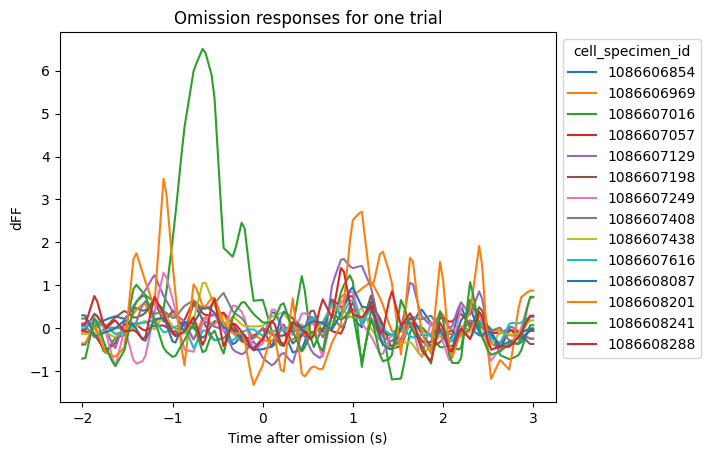

In [28]:

# Lets plot all the cell responses for one trial
fig, ax = plt.subplots()
for i, cell_specimen_id in enumerate(omission_responses.cell_specimen_id.unique()): 
    trace = omission_responses[omission_responses.cell_specimen_id==cell_specimen_id].trace.values[0]
    timestamps = omission_responses[omission_responses.cell_specimen_id==cell_specimen_id].trace_timestamps.values[0]
    ax.plot(timestamps, trace, label=cell_specimen_id)
# Put the legend with cell IDs outside the plot
ax.legend(bbox_to_anchor=(1,1), title='cell_specimen_id')
ax.set_ylabel('dFF')
ax.set_xlabel('Time after omission (s)')
ax.set_title('Omission responses for one trial')

#### Plot a heatmap of all cell activity traces for one trial

The `traces` in the table are provided as a list of values. To get the traces for a single neuron or single trial as an array, we can use np.vstack. 

In [29]:
# Getting the values of traces for some subset of the dataframe gives an array of arrays
stimulus_presentations_id = 100
trial_activity = ophys_response_df[ophys_response_df.stimulus_presentations_id==stimulus_presentations_id].trace.values
# We selected all cell responses for one trial, so the shape of the result is the number of neurons 
print(trial_activity.shape) 
# Since this is a Vip-IRES-Cre mouse, there are only a few cells

(14,)


In [30]:
# Using vstack can turn the data into a matrix of neurons by timepoints
trial_activity_matrix = np.vstack(trial_activity)
print(trial_activity_matrix.shape)

(14, 151)


Text(0.5, 1.0, 'Activity of all neurons for stim #100')

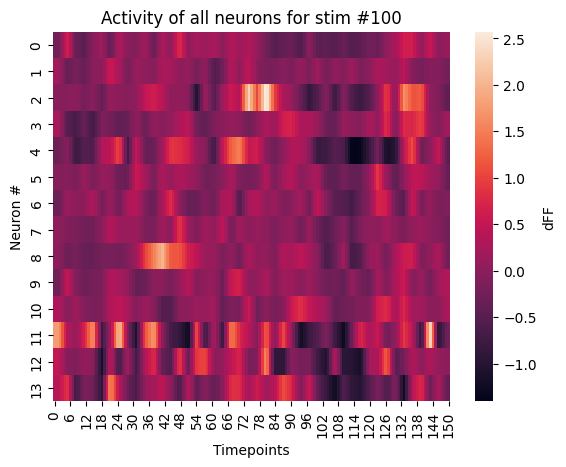

In [31]:
# Now we can plot it as a heatmap
fig, ax = plt.subplots()
ax = sns.heatmap(trial_activity_matrix, cbar_kws={'label':'dFF'})
ax.set_ylabel('Neuron #')
ax.set_xlabel('Timepoints')
ax.set_title('Activity of all neurons for stim #'+str(stimulus_presentations_id))

#### Plot a heatmap of cell activity traces averaged across trials

In this case we want to collect all trials of a given type and average them before creating our matrix. 

To get the trial type information, we need to merge with the `annotated_stimulus_presentations` table

In [32]:
# Merge with annotated stimulus presentations so we can subset to specific conditions
# Both tables have the 'stimulus_presentations_id' as a column, and no other unique columns, so we can merge easily
ophys_response_df = ophys_response_df.merge(annotated_stimulus_presentations, on='stimulus_presentations_id')

In [33]:
# Limit response dataframe to omissions
omission_responses = ophys_response_df[ophys_response_df.omitted==True]
# Loop through each cell and take the average across trials, 
# then add the result to a list (which can be converted to a matrix) for plotting
responses_list = []
for cell_specimen_id in omission_responses.cell_specimen_id.unique():
    mean_trace = omission_responses[omission_responses.cell_specimen_id==cell_specimen_id].trace.mean()
    responses_list.append(mean_trace)

omission_response_matrix = np.asarray(responses_list)

Text(0.5, 1.0, 'Average omission response across neurons')

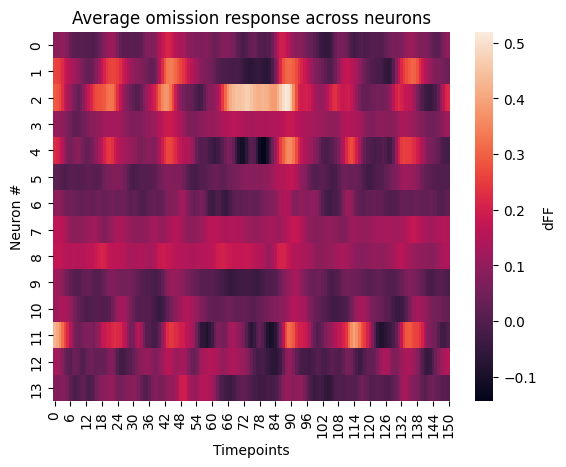

In [34]:
# Now we can plot it as a heatmap
fig, ax = plt.subplots()
ax = sns.heatmap(omission_response_matrix, cbar_kws={'label':'dFF'})
ax.set_ylabel('Neuron #')
ax.set_xlabel('Timepoints')
ax.set_title('Average omission response across neurons')

#### Get a population vector across trials

We can use the `mean_response` column to get a single value for each trial for each cell. 
This is typically called a "population vector" and can be used for a variety of analyses, such as decoding or dimensionality reduction. 

The pandas method `pivot` can be useful to reorganize the data. 

In [35]:
# get change responses
change_response_df = ophys_response_df[ophys_response_df.is_change==True]

# pivot to get mean response over change trials
population_vector_over_change_trials = change_response_df.pivot(index='cell_specimen_id', 
                                                               columns=['stimulus_presentations_id'], 
                                                               values=['mean_response'])
# drop the 'mean_response' label, which isnt needed
population_vector_over_change_trials.columns = population_vector_over_change_trials.columns.droplevel(level=0)

population_vector_over_change_trials.head()

stimulus_presentations_id,13,32,44,64,75,119,142,157,168,178,...,4666,4677,4687,4713,4729,4739,4754,4765,4778,4789
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
1086606854,1.037131,0.192836,0.326023,0.057486,-0.027701,0.433602,-0.057690,0.279233,0.194725,1.174561,...,0.239762,-0.362861,0.005490,3.206558,0.840891,2.623270,0.216164,-0.049672,-0.266464,-0.106445
1086606969,0.613293,0.286440,0.342965,0.579389,0.176003,0.616441,0.292238,0.104669,0.993163,1.082319,...,0.432940,0.068349,0.133544,0.553960,-0.020543,0.993324,-0.105054,0.073896,0.036267,-0.142658
1086607016,0.811735,0.056788,-0.296134,0.400772,0.139860,0.420029,0.226740,-0.068111,0.320471,-0.147600,...,0.582613,0.116609,0.069750,0.732529,0.403301,-0.235098,0.146890,0.396647,-0.340775,0.076140
1086607057,0.212802,0.865128,0.935233,0.579602,1.256327,0.054235,0.296372,0.119154,0.025165,1.877976,...,-0.180185,0.030411,0.225998,0.898170,0.014507,2.366194,-0.002161,-0.048749,-0.068978,-0.034330
1086607129,1.743995,2.175350,0.206781,0.896102,0.639641,0.275407,0.474850,0.011588,1.776447,0.643223,...,-0.031547,-0.048876,0.302394,3.019730,-0.275152,2.939253,0.064701,-0.103784,0.715799,-0.365291


[Text(0, 0, '0'), Text(0, 14, '14')]

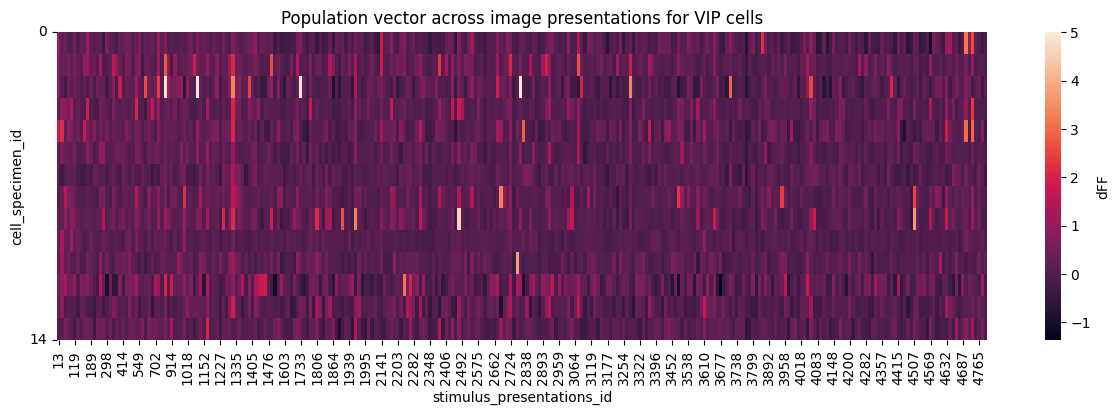

In [36]:
# plot the population vector
fig, ax = plt.subplots(figsize=(15,4))
ax = sns.heatmap(population_vector_over_change_trials, vmax = 5, cbar_kws={'label':'dFF'}, ax=ax)
ax.set_title('Population vector across image presentations for VIP cells')
ax.set_yticks([0, len(population_vector_over_change_trials)])
ax.set_yticklabels([0, len(population_vector_over_change_trials)])

Now for omissions

In [37]:
# get omission responses
omission_response_df = ophys_response_df[ophys_response_df.omitted==True]

# pivot to get mean response over change trials
population_vector_over_omissions = omission_response_df.pivot(index='cell_specimen_id', 
                                                               columns=['stimulus_presentations_id'], 
                                                               values=['mean_response'])
# drop the 'mean_response' label, which isnt needed
population_vector_over_omissions.columns = population_vector_over_omissions.columns.droplevel(level=0)

population_vector_over_omissions.head()

stimulus_presentations_id,2,27,46,65,101,106,125,135,191,241,...,4653,4673,4678,4690,4706,4714,4717,4736,4750,4809
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
1086606854,-0.262987,-0.173802,-0.207849,-0.285729,-0.364396,-0.120782,-0.118686,-0.723656,0.109043,-0.070203,...,-0.289930,-0.013636,0.104440,-0.076929,-0.436405,0.395229,-0.066023,1.831902,0.243774,1.560435
1086606969,0.014035,-0.591858,-0.313303,-0.275835,-0.088534,-0.174090,-0.099359,-0.419061,-0.127391,-0.143458,...,0.235104,0.008039,-0.105937,0.090156,0.049053,-0.213676,-0.166977,0.261251,0.137601,0.189649
1086607016,-0.137361,0.033235,0.684370,-0.186058,0.113677,-0.147014,-0.155293,-1.348685,-0.235454,3.589503,...,0.171963,0.654295,-0.387681,-0.266499,-0.136609,-0.026061,-0.185510,0.168990,0.132166,-0.628695
1086607057,-0.008141,-0.193731,-0.292437,-0.399366,0.411473,0.354139,0.695280,-0.160146,-0.116532,-0.049833,...,-0.071276,0.015210,-0.063054,-0.170564,-0.003755,0.061162,-0.193221,0.504519,0.043439,1.381898
1086607129,0.009636,0.194674,-0.061413,-0.314319,0.078629,0.386989,-0.459574,-1.147261,-0.333583,-0.362065,...,0.559272,0.417522,0.513505,0.156667,-0.047943,-0.437559,-0.666113,0.375633,-0.040667,0.404169


[Text(0, 0, '0'), Text(0, 14, '14')]

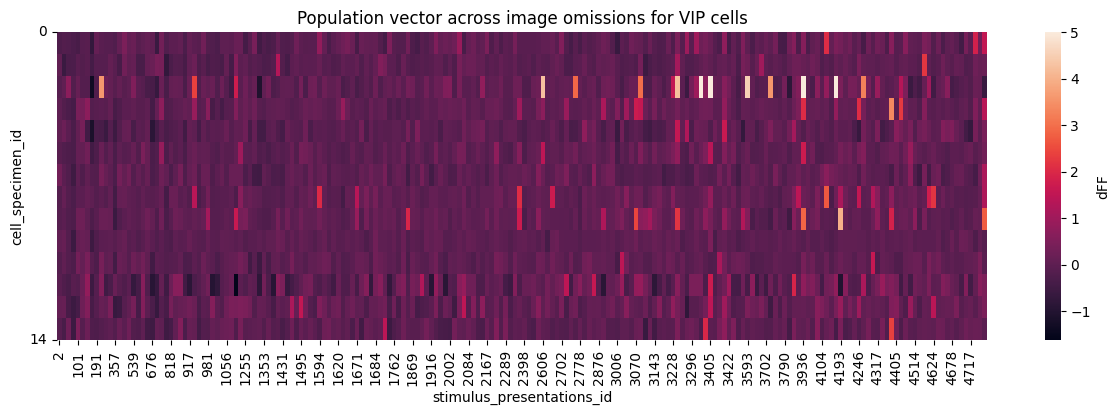

In [38]:
# plot the population vector
fig, ax = plt.subplots(figsize=(15,4))
ax = sns.heatmap(population_vector_over_omissions, vmax = 5, cbar_kws={'label':'dFF'}, ax=ax)
ax.set_title('Population vector across image omissions for VIP cells')
ax.set_yticks([0, len(population_vector_over_omissions)])
ax.set_yticklabels([0, len(population_vector_over_omissions)])

Text(0.5, 0, 'Time in session (s)')

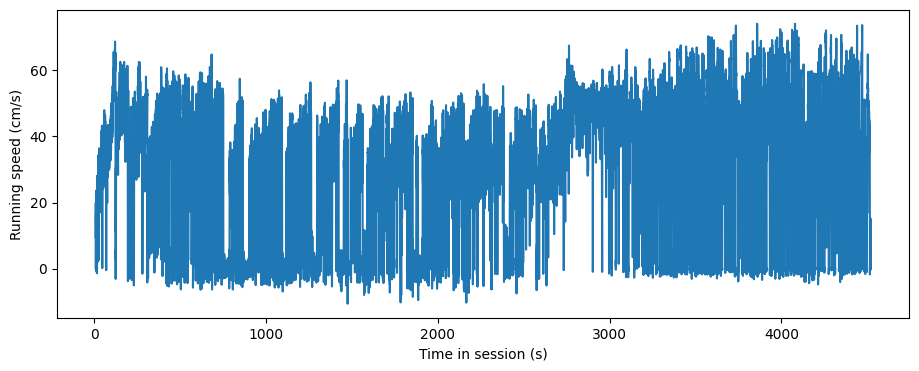

In [39]:
# Could this pattern relate to running behavior?
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(ophys_experiment.stimulus_timestamps, ophys_experiment.running_speed.speed.values)
ax.set_ylabel('Running speed (cm/s)')
ax.set_xlabel('Time in session (s)')